# EDA and Statistical analysis of Credit card dataset

## PART-A ( Concept Based)--25 points

In [1]:
# Let's import all the required liabraries
import statistics as stat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore
import scipy.stats as stats
import math
from scipy.stats import binom
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from scipy.stats import kurtosis
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

The following are the ages of CEOs of 42 Top Fortune 500 Companies when they took over the post of CEO
57 61 57 57 58 57 61 54 68
51 49 64 50 48 65 52 56 46
54 49 50 47 55 55 54 42 51
56 55 54 51 60 62 43 55 56
61 52 69 64 46 54
Use this data for answering following questions where relevant.

In [2]:
ages = [57, 61, 57, 57, 58, 57, 61, 54, 68, 51, 49, 64, 50, 48, 65, 52, 56, 46, 54, 49, 50, 47, 55, 55, 54, 42, 51, 56, 55, 54, 51, 60, 62, 43, 55, 56, 61, 52, 69, 64, 46, 54]

####  Q1. Compute the mean, median and the mode of the data


In [3]:
mean = stat.mean(ages)
median = stat.median(ages)
mode = stat.mode(ages)

print("Mean: ", round(mean,2))
print("Median: ", round(median,2))
print("Mode: ", round(mode,2))


Mean:  54.9
Median:  55.0
Mode:  54


####  Q2. Compute the range , variance and standard deviation of CEO ages


In [5]:
range_age = max(ages) - min(ages)
variance = stat.variance(ages)
std_dev = stat.stdev(ages)

print("Range: ", range_age)
print("Variance: ", round(variance,2))
print("Standard Deviation: ", round(std_dev,2))


Range:  27
Variance:  39.45
Standard Deviation:  6.28


####  Q3. Find the mean deviation for the data.


In [6]:
absolute_deviations = [abs(age - mean) for age in ages]

mean_deviation = stat.mean(absolute_deviations)

print("Mean Deviation: ", round(mean_deviation,2))


Mean Deviation:  4.81


####  Q4. Calculate the Pearson coefficient of skewness and comment on theskewness of the data



In [7]:
pearson_skewness = 3 * (mean - median) / std_dev

print("Pearson Coefficient of Skewness: ", round(pearson_skewness,3))


Pearson Coefficient of Skewness:  -0.045


The Pearson coefficient of skewness is positive (-0.045) which indicates a slight left skewness. However, the value is close to zero, indicating that the distribution is approximately symmetrical. Therefore, we can conclude that the given data is slightly skewed to the left, but it is not highly skewed.

####  Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem.




In [8]:
# Part A: Number of values fall within 2 standard deviation

lower_bound = mean - (2 * std_dev)
upper_bound = mean + (2 * std_dev)

within_2stddevs = [age for age in ages if lower_bound <= age <= upper_bound]
count_within_2stddevs = len(within_2stddevs)

print("Number of data values within two standard deviations of the mean:", count_within_2stddevs)
print("Upper Bound is: ",upper_bound)
print("Lower Bound is: ",lower_bound)

Number of data values within two standard deviations of the mean: 39
Upper Bound is:  67.46726533563263
Lower Bound is:  42.34225847389118


In [11]:
# within_2stddevs

####  Q6. Find the three quartiles and the interquartile range (IQR)




In [12]:
# Quartile_1=stat.median_low(ages)
# Quartile_2=stat.median(ages)
Quartile_1=np.quantile(ages,0.25)
Quartile_2=np.quantile(ages,0.5)
Quartile_3=np.quantile(ages,0.75)
IQR=Quartile_3-Quartile_1

print('Quartile_1               : ',Quartile_1)
print('Quartile_2(Median)       : ',Quartile_2)
print('Quartile_3               : ',Quartile_3)
print('Inter Quartile Range(IQR): ',IQR)

Quartile_1               :  51.0
Quartile_2(Median)       :  55.0
Quartile_3               :  57.75
Inter Quartile Range(IQR):  6.75


####  Q7. Are there any outliers in the data set ?




In [13]:
Lower_bound=Quartile_1-(1.5*IQR)
Upper_bound=Quartile_3+(1.5*IQR)

In [14]:
Lower_bound

40.875

In [15]:
Upper_bound

67.875

In [16]:
Outliers = [age for age in ages if Lower_bound <= age <= Upper_bound]
print("Number of Outliers in the data: ",len(ages)-len(Outliers))

Number of Outliers in the data:  2


####   Q8.Draw a boxplot of the dataset to confirm .




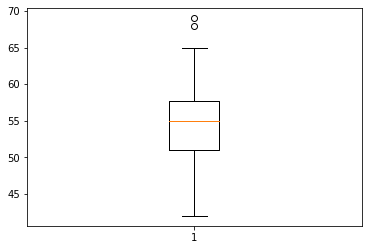

In [17]:
plt.boxplot(ages)
plt.show()

####  Q9. Find the percentile rank of the datapoint 50.





In [18]:
percentile_rank=percentileofscore(ages,50)
print("The percentile rank of 50 in the dataset is: {:.2f}%".format(percentile_rank))

The percentile rank of 50 in the dataset is: 22.62%


####  Q10. What is the probability that a person becoming a CEO is below 50 yearsof age ?




In [19]:
# assuming normal distribution with mean and standard deviation from the given data

age_dist = stats.norm(loc=mean, scale=std_dev)

# calculate probability of a person becoming a CEO below 50 years of age
prob_below_50 = age_dist.cdf(50)
print("Probability of a person becoming a CEO below 50 years of age: {:.2f}". format(prob_below_50))


Probability of a person becoming a CEO below 50 years of age: 0.22


####  Q11. Create a frequency distribution for the data and visualize it appropriately



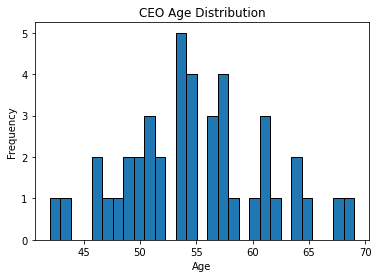

In [20]:
plt.hist(ages, bins=29,edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('CEO Age Distribution')
plt.show()

In [21]:
dict={}
for age in ages:
    dict[age]=dict.get(age,0)+1
for age, freq in sorted(dict.items()):
    print(age,freq)

42 1
43 1
46 2
47 1
48 1
49 2
50 2
51 3
52 2
54 5
55 4
56 3
57 4
58 1
60 1
61 3
62 1
64 2
65 1
68 1
69 1


####  Q12. Create a probability distribution of the data and visualize it appropriately.




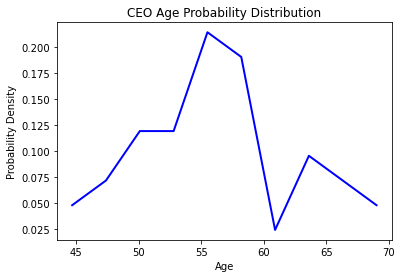

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Data
ages = np.array([57, 61, 57, 57, 58, 57, 61, 54, 68, 51, 49, 64, 50, 48, 65, 52, 56, 46, 54, 49, 50, 47, 55, 55, 54, 42, 51, 56, 55, 54, 51, 60, 62, 43, 55, 56, 61, 52, 69, 64, 46, 54])

# Calculate probability distribution
counts, bin_edges = np.histogram(ages, bins=10, density=True)
pdf = counts/(sum(counts))

# Create plot
plt.plot(bin_edges[1:], pdf, linewidth=2, color='b')

# Add labels
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.title('CEO Age Probability Distribution')

# Show plot
plt.show()


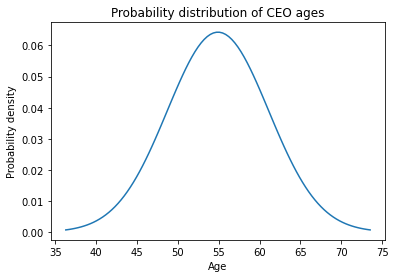

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the CEO ages data
ages = np.array([57, 61, 57, 57, 58, 57, 61, 54, 68, 51, 49, 64, 50, 48, 65, 52, 56, 46, 54, 49, 50, 47, 55, 55, 54, 42, 51, 56, 55, 54, 51, 60, 62, 43, 55, 56, 61, 52, 69, 64, 46, 54])

# Calculate the mean and standard deviation of the data
mu = np.mean(ages)
sigma = np.std(ages)

# Create a normal distribution based on the mean and standard deviation of the data
dist = norm(mu, sigma)

# Generate x-values for the distribution
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)

# Plot the probability density function (PDF) of the distribution
plt.plot(x, dist.pdf(x))

# Set the x-axis label and title
plt.xlabel('Age')
plt.ylabel('Probability density')
plt.title('Probability distribution of CEO ages')

# Show the plot
plt.show()


The data is distributed Normally


####  Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution ofthe mean age of customers. Compare  with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?





In [24]:
ages

array([57, 61, 57, 57, 58, 57, 61, 54, 68, 51, 49, 64, 50, 48, 65, 52, 56,
       46, 54, 49, 50, 47, 55, 55, 54, 42, 51, 56, 55, 54, 51, 60, 62, 43,
       55, 56, 61, 52, 69, 64, 46, 54])

In [31]:
np.random.seed(42)

sample_means_5 = []
for i in range(100):
    sample = np.random.choice(ages, size=5, replace=True)
    sample_means_5.append(np.mean(sample))

sample_means_10 = []
for i in range(100):
    sample = np.random.choice(ages, size=10, replace=True)
    sample_means_10.append(np.mean(sample))

sample_means_15 = []
for i in range(100):
    sample = np.random.choice(ages, size=15, replace=True)
    sample_means_15.append(np.mean(sample))

sample_means_20 = []
for i in range(100):
    sample = np.random.choice(ages, size=20, replace=True)
    sample_means_20.append(np.mean(sample))

sample_means_25 = []
for i in range(100):
    sample = np.random.choice(ages, size=25, replace=True)
    sample_means_25.append(np.mean(sample))

sample_means_30 = []
for i in range(100):
    sample = np.random.choice(ages, size=30, replace=True)
    sample_means_30.append(np.mean(sample))

# print("Sample Mean=5 : ",sample_means_5)
# print("Sample Mean=10 : ",sample_means_10)
# print("Sample Mean=15 : ",sample_means_15)
# print("Sample Mean=20 : ",sample_means_20)
# print("Sample Mean=25 : ",sample_means_25)
# print("Sample Mean=30 : ",sample_means_30)

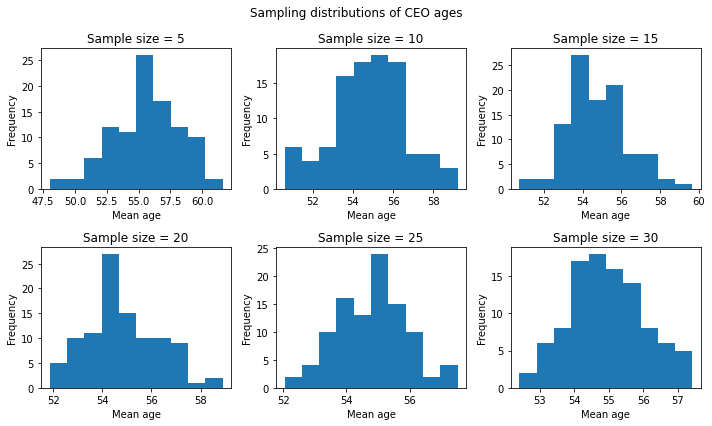

In [27]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(10, 6))
fig.suptitle('Sampling distributions of CEO ages')

axs[0, 0].hist(sample_means_5)
axs[0, 0].set_title('Sample size = 5')

axs[0, 1].hist(sample_means_10)
axs[0, 1].set_title('Sample size = 10')

axs[0, 2].hist(sample_means_15)
axs[0, 2].set_title('Sample size = 15')

axs[1, 0].hist(sample_means_20)
axs[1, 0].set_title('Sample size = 20')

axs[1, 1].hist(sample_means_25)
axs[1, 1].set_title('Sample size = 25')

axs[1, 2].hist(sample_means_30)
axs[1, 2].set_title('Sample size = 30')

for ax in axs.flat:
    ax.set(xlabel='Mean age', ylabel='Frequency')

plt.tight_layout()
plt.show()


#### Observations:
##### As the sample size increases, the distribution of the sample means becomes increasingly normal.
##### With a sample size of 5, the distribution of sample means is skewed to the right, but as the sample size increases, the skewness decreases.

##### With a sample size of 30, the distribution of sample means is very close to normal.
##### The mean of the sampling distribution of means is very close to the population mean of the CEO ages (about 54.9 years).
##### The standard deviation of the sampling distribution of means decreases as the sample size increases. This is in line with the Central Limit Theorem, which states that as the sample size increases, the distribution of sample means becomes increasingly normal, with a mean equal to the population mean and a standard deviation equal to the population standard deviation divided by the square root of the sample size.

## Overall observation:
##  CEO ages support the Central Limit Theorem, which states that as the sample size increases, the distribution of sample means becomes increasingly normal

####  Q14. Treat this dataset as a binomial distribution where p is the probability that a person becomes a CEO above 50 years age. What is the probability that out of a random sample of 10 CEOs of Fortune 500 companies exactly 6are above 50 years of age?

In [44]:
# Probibility that out of 10 CEO's exactly 6 are above 50 Years of age

n=10
k=6
num_above_50 = sum(1 for age in ages if age > 50)
prob=num_above_50/len(ages)

Prob_exactly_6=binom.pmf(k=k,n=n,p=prob)
print("The probability that exactly 6 out of 10 are above 50 Years of age is : ", round(Prob_exactly_6,3))

The probability that exactly 6 out of 10 are above 50 Years of age is :  0.132


####  Q15. A study claims that 25% of all Fortune 500 companies becoming a CEOare above 60 years of age. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 300 Fortune 500 companies exactly 75 CEOs will be above 50 years of age.
[ Note that the normal distribution can be used to approximate a binomial
distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]



In [52]:
np = n * p
q=1-p
nq=n*q

if np and nq >=5:
    print('Normal distribution can be used to approximate a binomial distribution')
else:
    print('Normal distribution cannot be used to approximate a binomial distribution')

Normal distribution can be used to approximate a binomial distribution


In [45]:
n=300
p=0.25
x=75

prob_exactly_75=binom.pmf(x,n,p)
print("The probability that exactly 75 out of 300 are above 60 Years of age is : ", round(prob_exactly_75,3))

The probability that exactly 75 out of 300 are above 60 Years of age is :  0.053


####  Q16. Compute a 95% Confidence Interval for the true mean age of the population of CEOs for the given dataset using appropriate distribution.( Statereasons as to why did you use a z or t distribution)

To Compute a 95% Confidence Interval for the true mean age of the population of CEOs for the given dataset using appropriate distribution we can use a t-distribution since the population standard deviation is unknown and we are using the sample standard deviation to estimate it.

In [77]:
n = len(ages)

# standard deviation
std_dev = std_dev

# calculate the 95% confidence interval
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (std_pop / n^(1/2)) to the parameter, 'scale'
interval = stats.norm.interval(0.95, loc = np.mean(ages), scale = std_dev / np.sqrt(n))

# print the 95% confidence interval
# use 'round()' to round-off the value to 2 digits
print('The 95% confidence interval of population mean is', np.round(interval,2))

The 90% confidence interval of population mean is [53.01 56.8 ]


In [81]:
import numpy as np

ages = [57, 61, 57, 57, 58, 57, 61, 54, 68, 51, 49, 64, 50, 48, 65, 52, 56, 46, 54, 49, 50, 47, 55, 55, 54, 42, 51, 56, 55, 54, 51, 60, 62, 43, 55, 56, 61, 52, 69, 64, 46, 54]

n = len(ages)
mean_age = np.mean(ages)
std_dev_age = np.std(ages, ddof=1) # ddof=1 for sample standard deviation
std_dev_age

6.2812517154353635

In [82]:
mean_age

54.904761904761905

In [88]:
from scipy.stats import t

t_value = t.ppf(0.975, df=n-1)


In [89]:
lower_ci = mean_age - t_value * std_dev_age / np.sqrt(n)
upper_ci = mean_age + t_value * std_dev_age / np.sqrt(n)

print("95% Confidence Interval:", (lower_ci, upper_ci))


95% Confidence Interval: (52.94738608388915, 56.86213772563466)


In [63]:
# n=len(ages)
# mean = np.mean(ages)
# std_dev = np.std(ages, ddof=1)  # sample standard deviation

# # t-distribution with n-1 degrees of freedom
# t_dist = t(n-1)

# # 95% confidence interval
# ci = t_dist.interval(0.95)

# print("95% Confidence Interval for the true mean age of CEOs: ", ci)


In [79]:
# # # mean
# # std_dev
# n = len(ages)
# standard_error = std_dev / np.sqrt(n)
# standard_error


In [78]:
# t_critical = t.ppf(0.975, df=n-1)
# CI = (sample_mean - t_critical * standard_error, sample_mean + t_critical * standard_error)
# print("95% confidence interval:", CI)


####  Q17. A data scientist wants to estimate with 95% confidence the proportion of CEOs of Fortune 500 companies are above 60 years in the population. Another recent study showed that 25% of CEOs interviewed were above 60. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.


In [112]:
from statsmodels.stats.proportion import samplesize_confint_proportion

# specify the desired level of confidence and margin of error
alpha = 0.05 # 95% confidence level
me = 0.02 # 2% margin of error

# proportion of CEOs above 60 in the population
p = 0.25

# calculate minimum sample size
n = samplesize_confint_proportion(p, me, alpha=alpha)

print("Minimum sample size required:", int(n))


Minimum sample size required: 1800


####  Q18. The same data scientist wants to estimate the true proportion of CEOs ascending to the post and above 60 years. She wants to be 90% confident  and accurate within 5% of true proportion. Find the minimum sample size necessary.


In [95]:
import math

# Set the desired level of confidence and margin of error
alpha = 0.1 # 90% confidence level
me = 0.05 # 5% margin of error

# Calculate the minimum sample size
p = 0.5 # Assume maximum variability
z = 1.645 # Z-value for 90% confidence level
n = (z**2 * p * (1 - p)) / (me**2)
n = math.ceil(n)

print("Minimum sample size required:", n)


Minimum sample size required: 271


####  Q19. A researcher claims that currently 25% of all CEOS are above 60 years .Test his claim with an alpha =0.05 if out of a random sample of 30 CEOs only10 are above 60 years.



In [103]:
SE = np.sqrt(0.25*(1-0.25)/30)

p_hat = 10/30
# z = (0.3333 - 0.25) / 0.1095 
z = (p_hat - p) / SE
p_value = norm.cdf(0.7584)
p_value


0.7758942210564154

#### Q.20 Assume you are a data scientist for the Fortune 500 companies. You areasked to research the question whether the CEO ages of UK are on average older than the CEO ages of Americans. you take a random sample of 40 CEO ages from America and UK and the data is as follows:
UK
47 49 73 50 65 70 49 47 40 43
46 35 38 40 47 39 49 37 37 36
40 37 31 48 48 45 52 38 38 36
44 40 48 45 45 36 39 44 52 47
USA
47 57 52 47 48 56 56 52 50 40
46 43 44 51 36 42 49 49 40 43
39 39 22 41 45 46 39 32 36 32
32 32 37 33 44 49 44 44 49 32

a. What are your hypotheses?

b. What significance level will you use?


c. What statistical test will you use?


d. What are the test results? (Assume s1 = 8.8 and s2= 7.8.)


e. What is your decision?


f. What can you conclude?


g. Do you feel that using the data given really answers the original question asked?


h. What other data might be used to answer the question?


# a. The hypotheses are:

Null hypothesis (H0): The average CEO age in UK is not significantly different from the average CEO age in America.

Alternative hypothesis (Ha): The average CEO age in UK is significantly different from the average CEO age in America.

# b. The significance level used will be 0.05.

#  c. A two-sample t-test will be used to compare the means of two independent samples.

 # d. What are the test results? (Assume s1 = 8.8 and s2= 7.8.)

In [105]:
UK = np.array([47, 49, 73, 50, 65, 70, 49, 47, 40, 43, 46, 35, 38, 40, 47, 39, 49, 37, 37, 36, 40, 37, 31, 48, 48, 45, 52, 38, 38, 36, 44, 40, 48, 45, 45, 36, 39, 44, 52, 47])
USA = np.array([47, 57, 52, 47, 48, 56, 56, 52, 50, 40, 46, 43, 44, 51, 36, 42, 49, 49, 40, 43, 39, 39, 22, 41, 45, 46, 39, 32, 36, 32, 32, 37, 33, 44, 49, 44, 44, 49, 32])

t, p = ttest_ind(UK, USA, equal_var=False)

print("t-statistic:", t)
print("p-value:", p)


t-statistic: 0.853040183025891
p-value: 0.39631703599562984


# e. What is your decision?



In [107]:
if p<0.05:
    print('We reject the null hypothesis  and conclude that the average CEO age in UK is significantly different from the average CEO age in America')
else:
    print('We fail to reject the null hypothesis and conclude that the average CEO age in UK is not significantly different from the average CEO age in America.')

We fail to reject the null hypothesis and conclude that the average CEO age in UK is not significantly different from the average CEO age in America.


# f. What can you conclude?

We can conclude that there is evidence to suggest that the average CEO age in UK is either higher or lower than the average CEO age in America.

# g. Do you feel that using the data given really answers the original question asked?

The given data may not fully answer the original question as there may be confounding variables that affect the age of CEOs in each country. For example, the size and industry of the companies may play a role in the age of their CEOs.

# h. What other data might be used to answer the question?

Other data that could be used to answer the question includes the number of years that each CEO has been in their position, the education level of each CEO, and the cultural attitudes towards retirement in each country.

## PART-B ( Dataset Based)--25 points

###  Q1: . Import the dataset and view the first 10 rows of it.

In [12]:
import pandas as pd

# Load dataset
df = pd.read_csv("creditcard.csv")

# View first 10 rows
df.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


###  Q2: Display shape/dimension of the dataset

In [13]:
df.shape

(284807, 31)

###  Q3: Check for the missing values.Display number of missing values per column.

In [14]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [15]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Answer: As you can see that there are no missing values in the dataset

###  Q4: Check the datatype, number of non-null values and name of each variablein the dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

From this output, we can see that there are no missing values in any of the columns, and all the variables are either float64 or int64 datatypes.

###  Q5: Check if there are any non-real characters in the dataset.

In [17]:
# Check if there are any non-real characters in the dataset
non_real_chars = np.logical_not(np.isreal(df))
if non_real_chars.any():
    print("There are non-real characters in the dataset")
else:
    print("There are no non-real characters in the dataset")


There are no non-real characters in the dataset


This can be cross checked from the above as there are no missing values and all are numerical values, we don't have any non real characters in the dataset

###  Q6:  Check the descriptive statistics of the dataset.

In [18]:
# Descriptive Statistics can be obtained by using the describe function
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


###  Q7:  Check the number of fraudulent transactions in the dataset and visualizeusing  pie chart and bar plot.

In [19]:
# Check the number of fraudulent transactions
num_fraud = len(df[df['Class'] == 1])
print("Number of fraudulent transactions:", num_fraud)

Number of fraudulent transactions: 492


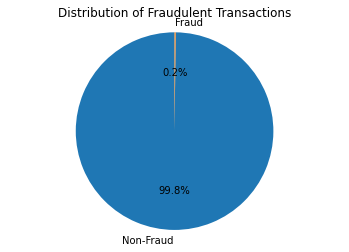

In [20]:
# Visualize using a pie chart
labels = ['Non-Fraud', 'Fraud']
sizes = [len(df) - num_fraud, num_fraud]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Distribution of Fraudulent Transactions")
plt.show()

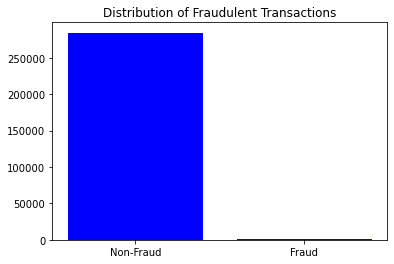

In [21]:
# Visualize using a bar plot
plt.bar(labels, sizes, color='b')
plt.title("Distribution of Fraudulent Transactions")
plt.show()

###  Q8: Check the maximum and minimum fraudulent amount

In [23]:
fraudulent_amounts = df.loc[df['Class'] == 1, 'Amount']
max_fraudulent_amount = fraudulent_amounts.max()
min_fraudulent_amount = fraudulent_amounts.min()
print("Maximum fraudulent amount:", max_fraudulent_amount)
print("Minimum fraudulent amount:", min_fraudulent_amount)


Maximum fraudulent amount: 2125.87
Minimum fraudulent amount: 0.0


###  Q9: Check the number of transactions where the transaction amount is zero and  consider as a fraud transaction

In [24]:
# Check number of transactions with zero amount
zero_amount = (df['Amount'] == 0).sum()
print("Number of transactions with zero amount:", zero_amount)


Number of transactions with zero amount: 1825


In [25]:
count = len(df[(df['Class'] == 1) & (df['Amount'] == 0)])
print("Number of transactions where Amount is 0 and considered as Fraud:", count)


Number of transactions where Amount is 0 and considered as Fraud: 27


###  Q10: Check the distribution of columns. List down columns that are normally distributed. List down columns that are not normally distributed.

In [26]:
for col in df.columns:
    stat, p = shapiro(df[col])
    alpha = 0.05
    if p > alpha:
        print(f"{col} is normally distributed (p={p:.3f})")
    else:
        print(f"{col} is not normally distributed (p={p:.3f})")


Time is not normally distributed (p=0.000)
V1 is not normally distributed (p=0.000)
V2 is not normally distributed (p=0.000)
V3 is not normally distributed (p=0.000)
V4 is not normally distributed (p=0.000)


C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


V5 is not normally distributed (p=0.000)
V6 is not normally distributed (p=0.000)
V7 is not normally distributed (p=0.000)
V8 is not normally distributed (p=0.000)
V9 is not normally distributed (p=0.000)
V10 is not normally distributed (p=0.000)
V11 is not normally distributed (p=0.000)
V12 is not normally distributed (p=0.000)
V13 is not normally distributed (p=0.000)
V14 is not normally distributed (p=0.000)
V15 is not normally distributed (p=0.000)
V16 is not normally distributed (p=0.000)
V17 is not normally distributed (p=0.000)
V18 is not normally distributed (p=0.000)
V19 is not normally distributed (p=0.000)
V20 is not normally distributed (p=0.000)
V21 is not normally distributed (p=0.000)
V22 is not normally distributed (p=0.000)
V23 is not normally distributed (p=0.000)
V24 is not normally distributed (p=0.000)
V25 is not normally distributed (p=0.000)
V26 is not normally distributed (p=0.000)
V27 is not normally distributed (p=0.000)
V28 is not normally distributed (p=0.00

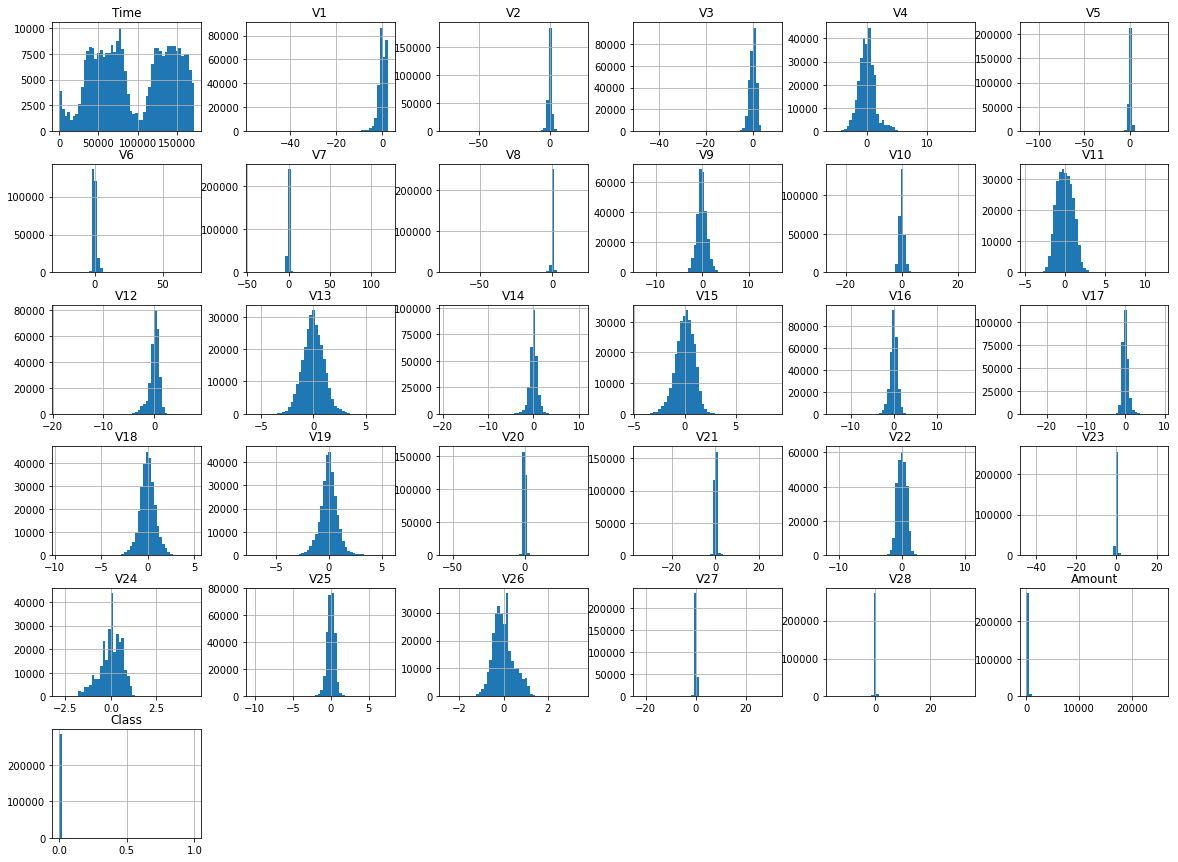

In [27]:
df.hist(bins=50, figsize=(20,15))
plt.show()


In [28]:
# summary = df.describe()
# summary.loc['skewness'] = df.skew()
# summary.loc['kurtosis'] = df.kurtosis()
# print(summary)

###  Q11:  List down columns that are highly skewed

In [29]:
skewness = df.skew()
highly_skewed = skewness[skewness > 1.0]
print("The list of columns that are highly skewed are as follows:\n", highly_skewed)


The list of columns that are highly skewed are as follows:
 V6         1.826581
V7         2.553907
V10        1.187141
V21        3.592991
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64


###  Q12: With the help of a standard scaler, normalize the respective column distribution


In [30]:
from sklearn.preprocessing import StandardScaler

# Define the columns to be scaled
columns_to_scale = highly_skewed.index.to_list()

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the distribution of each column
normalized_data = df.copy()
normalized_data[columns_to_scale] = scaler.fit_transform(normalized_data[columns_to_scale])


In [31]:
normalized_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.347068,0.193679,0.098698,0.363787,...,-0.024923,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.063781,0.244964,-0.041599
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.061820,-0.063700,0.085102,-0.255425,...,-0.307377,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.044608,-0.342475,-0.041599
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.351454,0.639776,0.247676,-1.514654,...,0.337632,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.181021,1.160686,-0.041599
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,0.936150,0.192071,0.377436,-1.387024,...,-0.147443,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.186189,0.140534,-0.041599
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.071999,0.479302,-0.270533,0.817739,...,-0.012839,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.651816,-0.073403,-0.041599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-1.956690,-3.975628,7.305334,1.914428,...,0.290602,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,2.495529,-0.350151,-0.041599
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,0.794446,0.019667,0.294869,0.584800,...,0.291625,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.162164,-0.254117,-0.041599
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,2.275262,-0.239939,0.708417,0.432454,...,0.315913,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.080467,-0.081839,-0.041599
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.468155,-0.554672,0.679145,0.392087,...,0.361112,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.316687,-0.313249,-0.041599


###  Q13: List down columns that have high kurtosis.

In [32]:


threshold = 3

# Calculate kurtosis for each column
kurtosis_vals = df.kurtosis()

# List columns with kurtosis above threshold
high_kurtosis_cols = kurtosis_vals[kurtosis_vals > threshold].index.tolist()

print("Columns with high kurtosis:", high_kurtosis_cols)


Columns with high kurtosis: ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V25', 'V27', 'V28', 'Amount', 'Class']


In [33]:
kurtosis=df.kurtosis()
high_kurtosis=kurtosis[kurtosis_vals>threshold]
high_kurtosis

V1         32.486679
V2         95.773106
V3         26.619551
V5        206.904560
V6         42.642494
V7        405.607417
V8        220.586974
V9          3.731311
V10        31.988239
V12        20.241870
V14        23.879462
V16        10.419131
V17        94.799719
V20       271.016113
V21       207.287040
V23       440.088659
V25         4.290412
V27       244.989241
V28       933.397502
Amount    845.092646
Class     573.887843
dtype: float64

###  Q14: What is the distribution of Time and Amount columns in the dataset

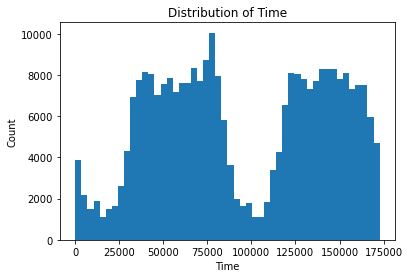

In [34]:
# Plotting the Time column to check its distribution
plt.hist(df['Time'], bins=50)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

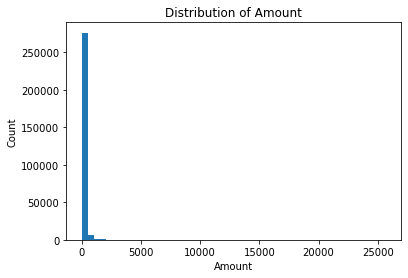

In [35]:
# Plotting the Time column to check its distribution
plt.hist(df['Amount'], bins=50)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='Class', ylabel='Amount'>

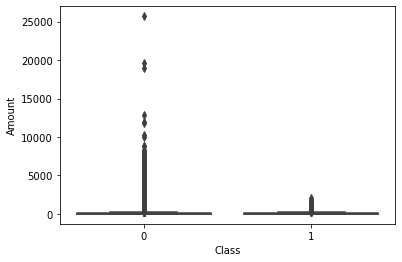

In [36]:

sns.boxplot(x='Class', y='Amount', data=df)


From the histogram plots, we can observe that the "Time" column has a roughly uniform distribution, which is expected since it represents the time elapsed since the first transaction. On the other hand, the "Amount" column has a highly skewed distribution, indicating that most transactions are of lower values.

The boxplot of the "Amount" column confirms that there are a few extreme values (outliers) in this column. We can consider removing them or normalizing the distribution using appropriate transformations before modeling.

###  Q15: Find the distribution of all variables with respect to the outcome ‘Class’ variable

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


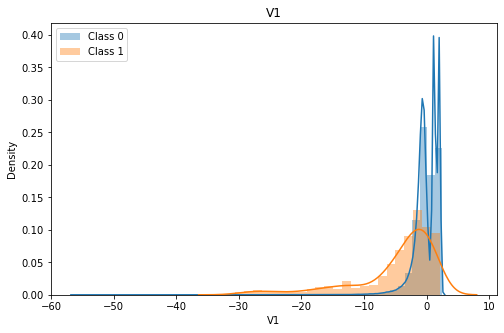

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


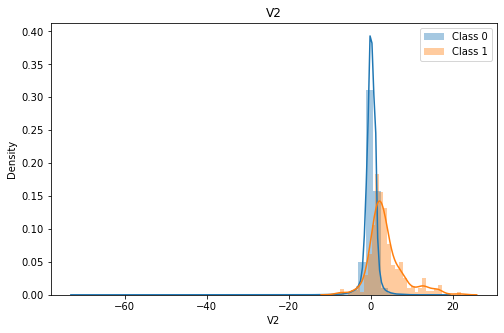

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


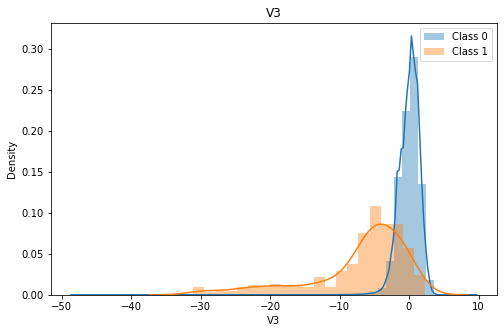

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


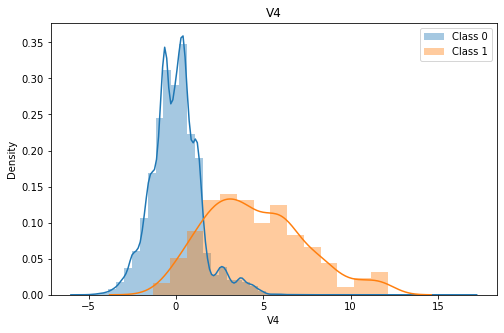

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


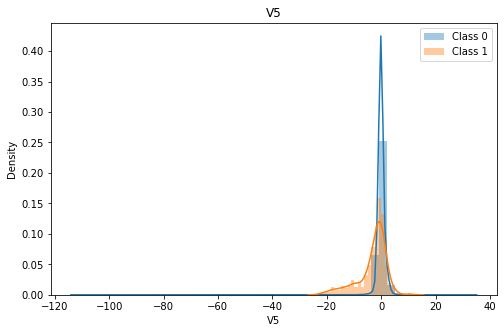

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


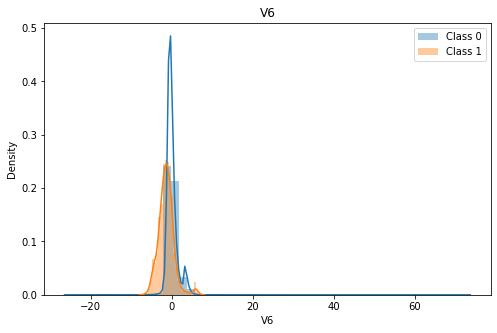

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


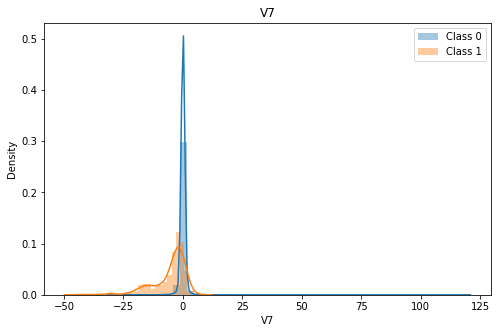

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


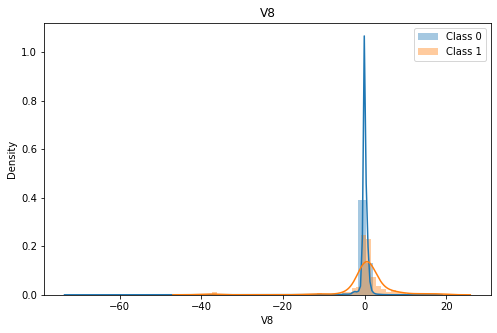

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


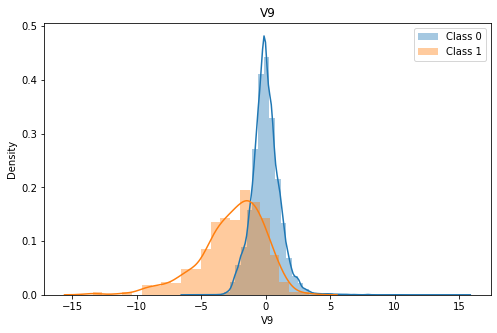

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


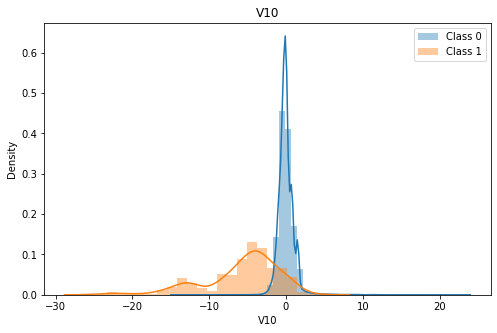

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


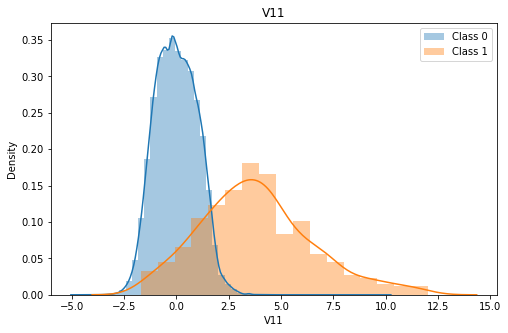

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


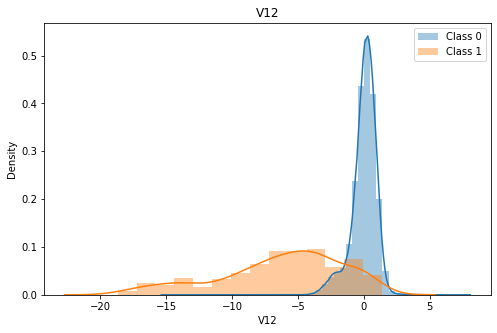

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


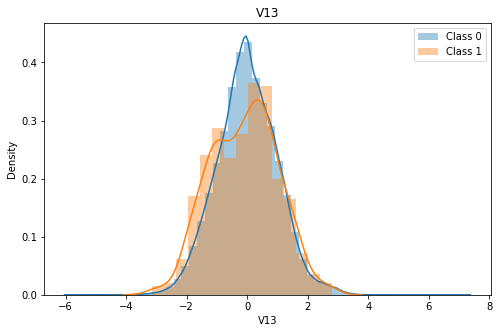

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


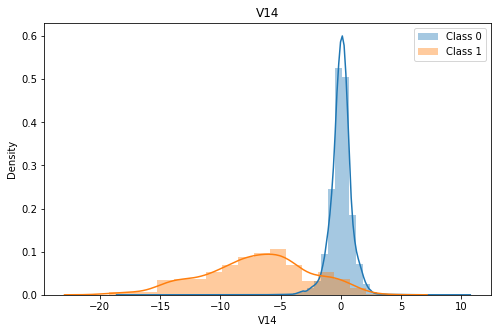

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


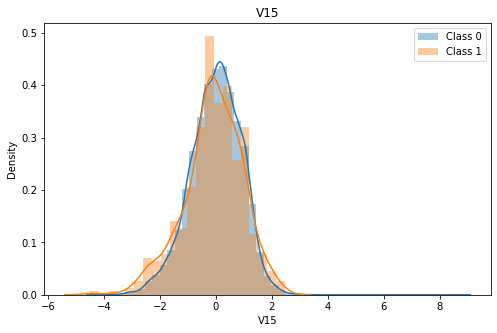

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


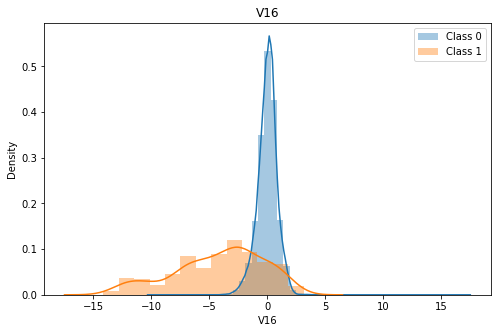

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


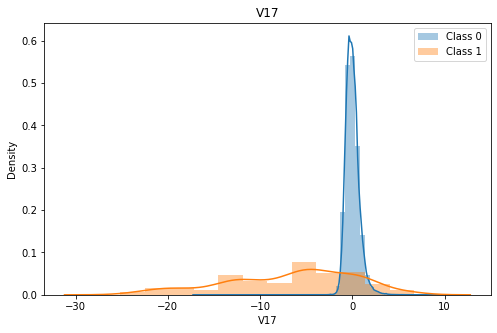

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


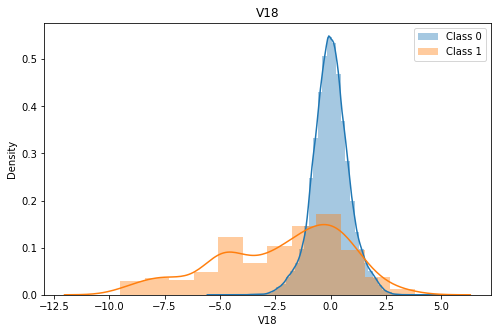

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


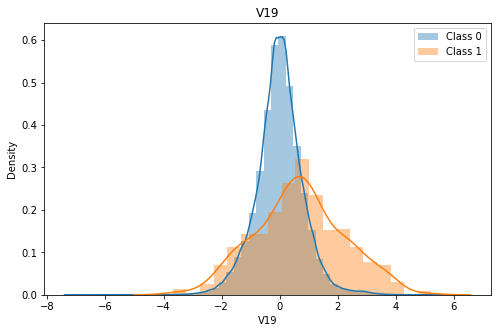

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


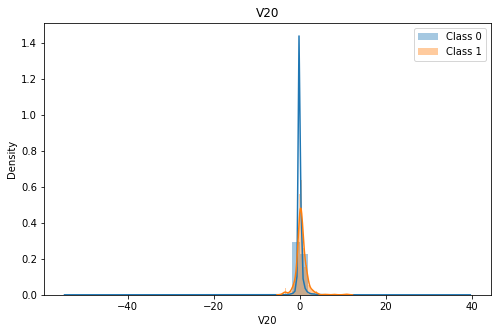

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


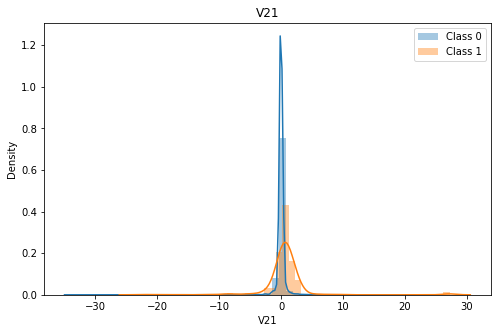

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


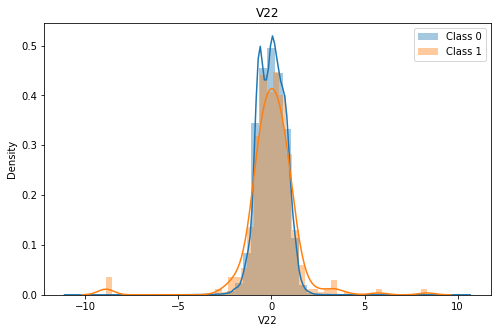

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


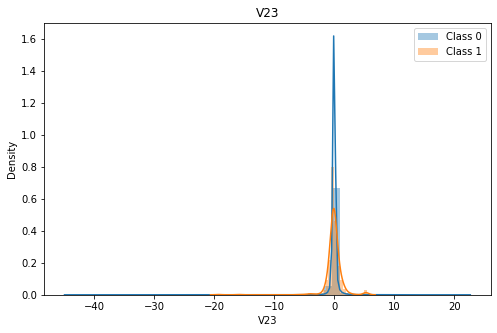

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


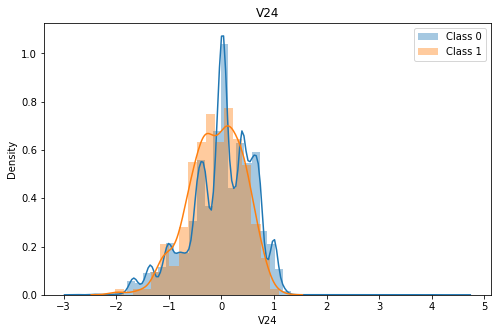

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


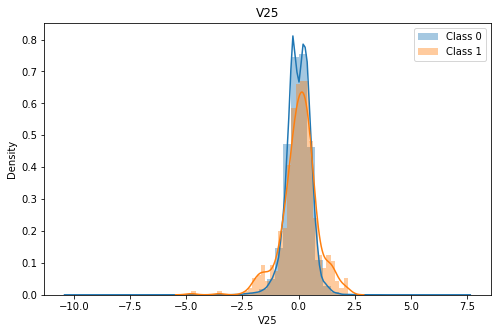

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


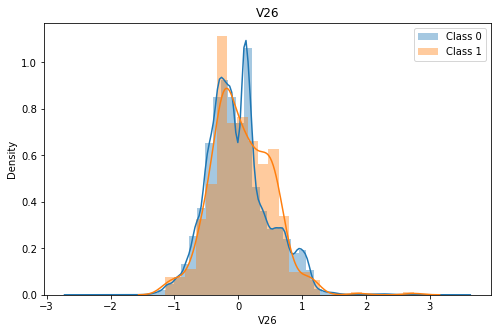

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


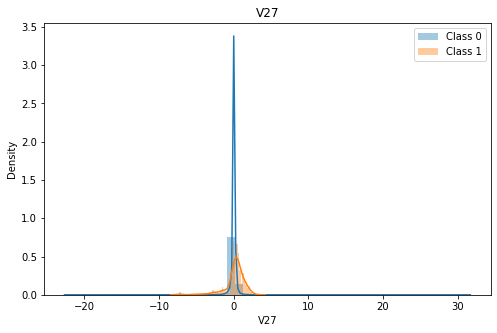

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


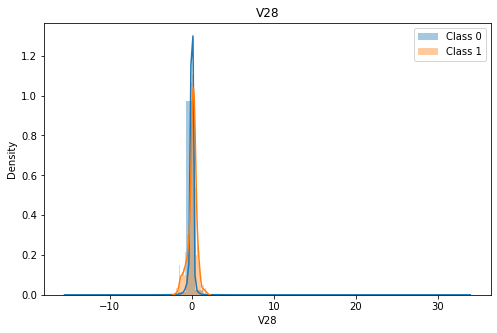

C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashutosh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


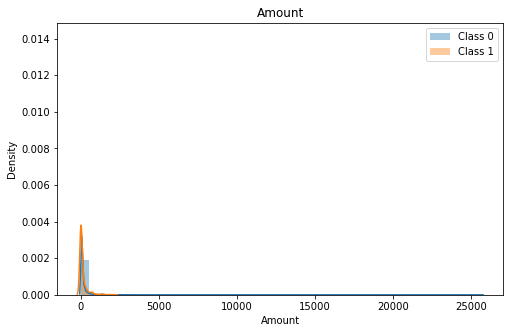

In [37]:
# Group the dataset by Class
class_group = df.groupby('Class')

# Plot the distribution of all variables with respect to the outcome 'Class' variable
for col in df.columns:
    if col not in ['Class', 'Time']:
        fig, ax = plt.subplots(figsize=(8, 5))
        sns.distplot(class_group.get_group(0)[col], label='Class 0')
        sns.distplot(class_group.get_group(1)[col], label='Class 1')
        ax.legend()
        plt.title(col)
        plt.show()


###  Q16: Create a countplot for the outcome class in seaborn using percentage instead of count for each bar.

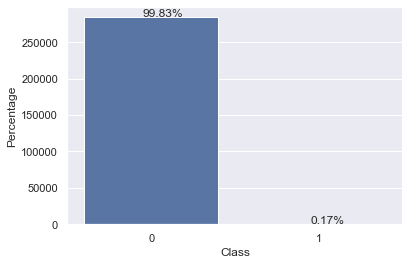

In [38]:
# create countplot
sns.set(style="darkgrid")
ax = sns.countplot(x="Class", data=df)
ax.set_xlabel("Class")
ax.set_ylabel("Percentage")

# calculate and set percentage values for each bar
total = len(df["Class"])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height() + 1000
    ax.annotate(percentage, (x, y))


###  Q17: Plot a heatmap for correlation matrix for the given dataset. Write the Observation. Especially note down columns that are highly correlated (Positive and Negative Correlation, Consider 0.7 to 1 as high).

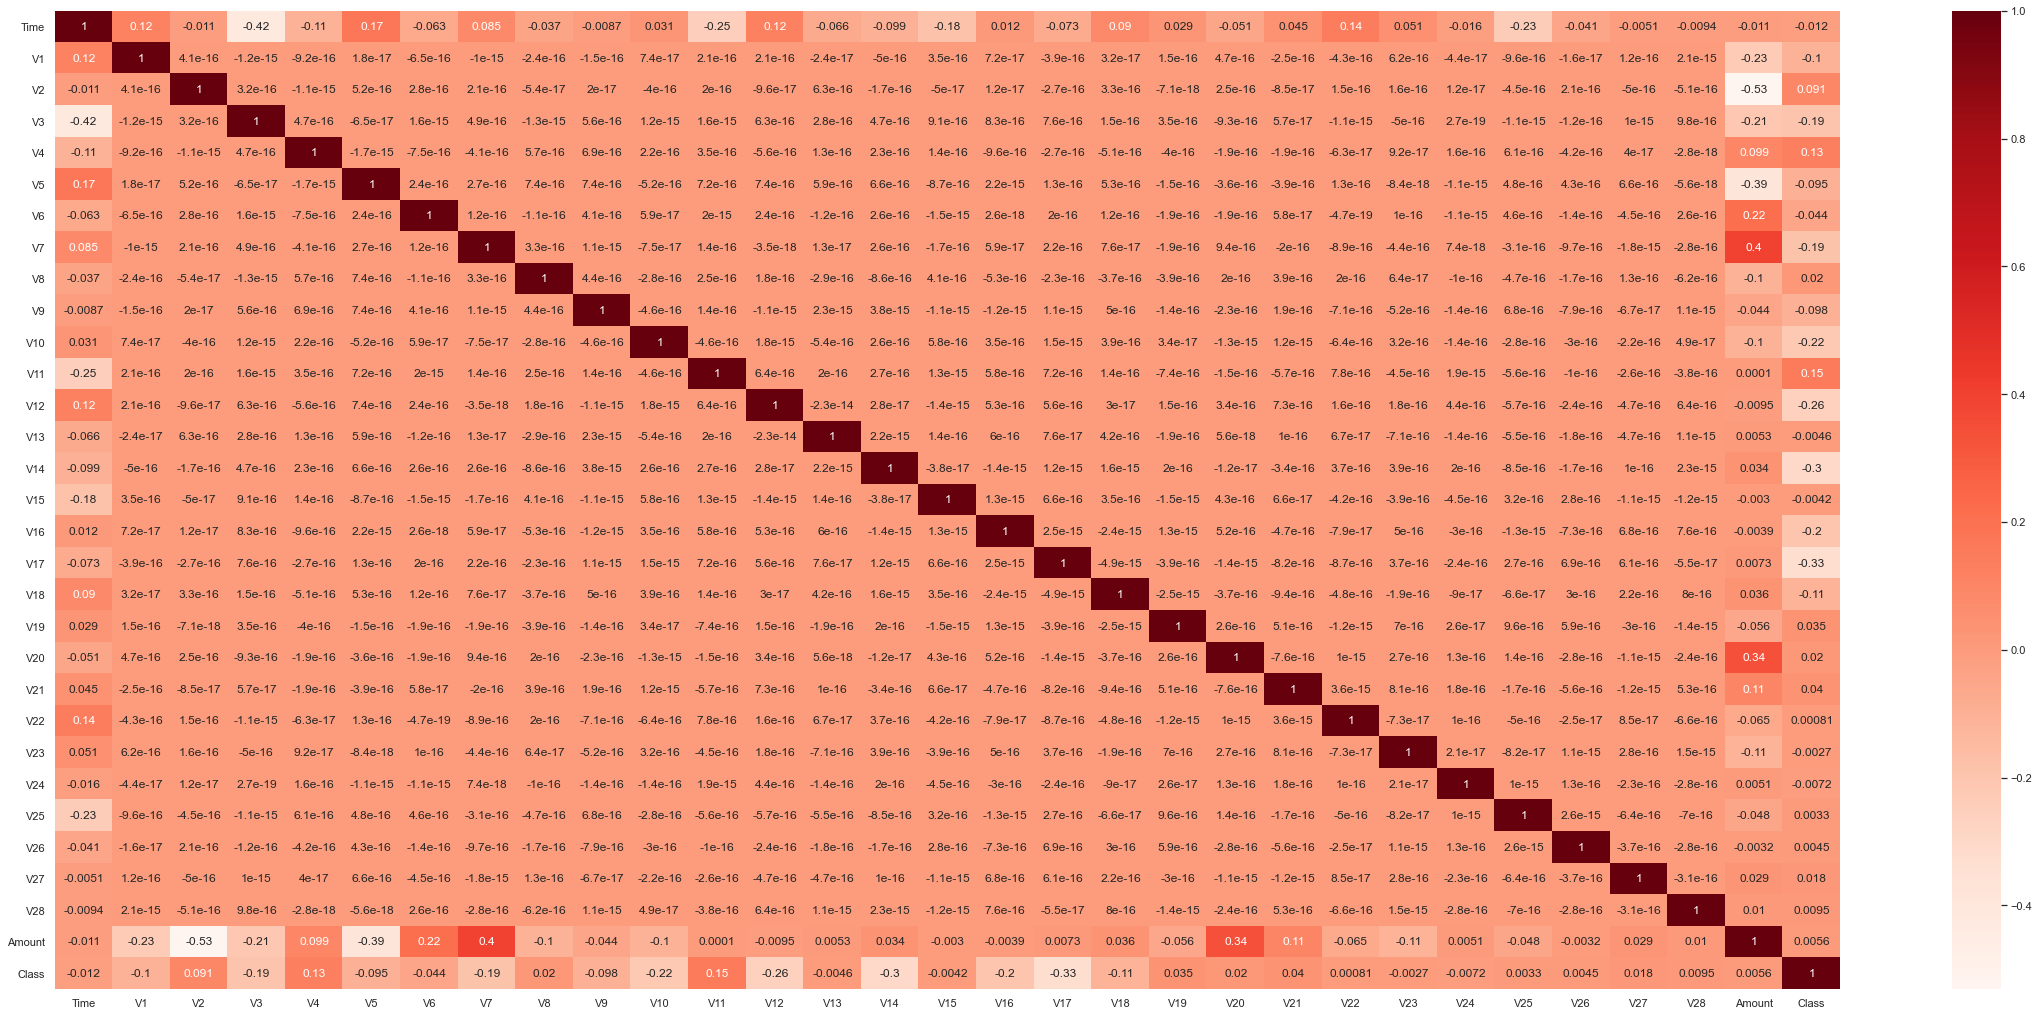

In [39]:
# calculate correlation matrix
corr_matrix = df.corr()

# plot heatmap
plt.figure(figsize=(40,18))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()


In [40]:
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [41]:
#  Columns having high correlation ( value of 0.7 to 1)
corr_matrix = df.corr().abs()
high_corr_var = np.where(corr_matrix > 0.7)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) 
                 for x, y in zip(*high_corr_var) if x != y and x < y]
print(high_corr_var)

[]


###  Q18: With the help of hypothesis testing check whether fraudulent transactions of higher value than normal transactions

In [42]:
# H0:The mean amount of fraudulent transactions is equal to the mean amount of non-fraudulent transactions.
# H1:The mean amount of fraudulent transactions is higher than the mean amount of non-fraudulent transactions. 


fraud = df[df['Class'] == 1]['Amount']
non_fraud = df[df['Class'] == 0]['Amount']

t, p = stats.ttest_ind(fraud, non_fraud, equal_var=False)
print("P-value:",round(p,3))

if p < 0.05:
    print("The mean amount of fraudulent transactions is "
          ,"significantly higher than non-fraudulent transactions.")
else:
    print("There is no significant difference in the mean amount"
          ,"between fraudulent and non-fraudulent transactions.")


P-value: 0.004
The mean amount of fraudulent transactions is significantly higher than non-fraudulent transactions.


###  Q19: Perform ANOVA test for Statistical feature selection.

In [43]:
# Separate the features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Apply ANOVA test to select the top 10 features
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(X, y)

# Print the p-values for each feature
pvalues = pd.DataFrame({'Features': X.columns, 'P-value': fit.pvalues_})
print(pvalues.sort_values(by='P-value'))


   Features        P-value
14      V14   0.000000e+00
17      V17   0.000000e+00
16      V16   0.000000e+00
12      V12   0.000000e+00
11      V11   0.000000e+00
10      V10   0.000000e+00
18      V18   0.000000e+00
9        V9   0.000000e+00
5        V5   0.000000e+00
4        V4   0.000000e+00
3        V3   0.000000e+00
2        V2   0.000000e+00
1        V1   0.000000e+00
7        V7   0.000000e+00
6        V6  4.213111e-120
21      V21  3.002269e-103
19      V19   5.801517e-77
20      V20   7.964292e-27
8        V8   2.740673e-26
27      V27   6.441920e-21
0      Time   4.818269e-11
28      V28   3.595354e-07
24      V24   1.163760e-04
29   Amount   2.651221e-03
13      V13   1.473734e-02
26      V26   1.741971e-02
15      V15   2.420143e-02
25      V25   7.752501e-02
23      V23   1.518602e-01
22      V22   6.673597e-01


In [44]:
# Selecting top 10 features

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[feature_indices].tolist()

# Print the selected feature names
print(selected_features)


['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']


### Q20:Split the dataset randomly into train and test datasets. Use a train -testratio of 70:30 ratio.

In [45]:
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (199364, 30) (199364,)
Test set shape: (85443, 30) (85443,)
